# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 6


### Zadanie 1

Zaimplementuj symulację paradoksu Monty'ego Halla. Np. po 10 000 rozgrywek dla obu przypadków (kiedy gracz zostaje przy wybranej bramke oraz kiedy gracz zmienia wybór).
Czy wnik symulacji jest zgodny z teorią? 

Z [Wikipedii](https://pl.wikipedia.org/wiki/Paradoks_Monty%E2%80%99ego_Halla):

> Zawodnik stoi przed trzema zasłoniętymi bramkami. Za jedną z nich (za którą – wie to tylko prowadzący program) jest nagroda (umieszczana całkowicie losowo). Gracz wybiera jedną z bramek. Prowadzący program odsłania inną bramkę (co istotne – anonsując, że jest to bramka pusta), po czym proponuje graczowi zmianę wyboru. <br /><br />
Intuicyjnie nie ma znaczenia, czy zawodnik pozostanie przy swoim wyborze, czy nie. Okazuje się jednak, że jest inaczej. Przy wyborze strategii pozostawania przy swoim pierwszym wyborze prawdopodobieństwo wygranej wynosi 1/3. Natomiast przy wyborze „strategii zmiany” wynosi 2/3. <br /><br />
Oznacza to, że zawodnikowi opłaci się zmienić bramkę, ponieważ ma wtedy dwa razy większe szanse na wygraną. Paradoks wynika z niedocenienia informacji, jaką „między wierszami” przekazuje prowadzący. Informacją tą jest wskazanie pustej bramki. <br /><br />
Innymi słowy poprzez otwarcie jednej z pustych bramek prowadzący zmniejsza liczność zbioru „pustych bramek”, a w rezultacie prawdopodobieństwo przegranej z 2/3 do 1/3. „Pozostałe” prawdopodobieństwo wygranej musi wynosić więc obecnie 2/3.
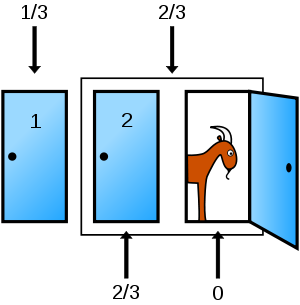




In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import math
n_tries = 10000

In [ ]:
# stayed = 0
# changed = 0
# n = 3
# for _ in range(n_tries):
#     prize = np.random.randint(0, n)
#     choice = np.random.randint(0, n)
#     if choice == prize:
#         stayed += 1
#     else:
#         changed += 1

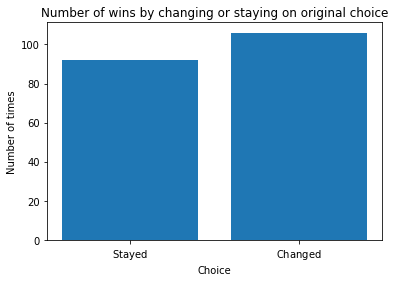

Gracz który nie zmienia swojego wyboru wygrał 0.0092% gier
Gracz który zmienia swoj wybor wygrał 0.0106% gier


In [12]:
stayed = 0
changed = 0
n = 100
for _ in range(n_tries):
    prize = np.random.randint(0, n)
    choice = np.random.randint(0, n)
    closed = prize
    while closed == prize or closed == choice:
        closed = np.random.randint(0, n)

    if choice == prize:
        stayed += 1
    else:
        new = choice
        while new == choice or new == closed:
            new = np.random.randint(0, n)
        if new == prize:
            changed += 1

plt.bar([0,1],[stayed,changed])
plt.ylabel('Number of times')
plt.xlabel('Choice')
plt.xticks([0,1],[r'$\mathrm{Stayed}$',r'$\mathrm{Changed}$'])
plt.title('Number of wins by changing or staying on original choice')
plt.show()
print(f'Gracz który nie zmienia swojego wyboru wygrał {stayed / n_tries}% gier')
print(f'Gracz który zmienia swoj wybor wygrał {changed / n_tries}% gier')

### Zadanie 2

#### A)
Wczytaj z klawiatury $m$ liter (mogą się powtarzać), a następnie wypisz wszystkie permutacje tych $m$ liter, podkreślając te, które tworzą poprawne polskie słowa (na podstawie słownika ściągniętego i wypakowanego z https://sjp.pl/sl/growy/).

Warunki:
- W jednej linii należy wypisać 5 permutacji, po czym przejść do nowego wiersza.
- Jeśli wprowadzony napis zawiera znaki spoza `[a-z]` (tylko litery łacińskie), to należy wypisać stosowny komunikat.
- Wprowadzone litery mogą się powtarzać, ale permutacji wtedy nie powtarzamy. 
Przykładowo, dla wprowadzonego ciągu `aaab` program ma wypisać tylko 4 permutacje (w dowolnej kolejności): `aaab`, `aaba`, `abaa`, `baaa`.

Przykład:

```
Podaj 4 litery z [a-z]: aatm
aatm    aamt    atam    atma    amat

amta    taam    tama    tmaa    maat
                ----
mata    mtaa
----
```

#### B)
Napisz wzór, który umożliwi wyświetlenie liczby tak opisanych permutacji bez konieczności ich generowania.



In [4]:
with open('slowa.txt', 'r') as f:
    slownik = f.read().splitlines()

In [5]:
m = 5
raw = input(f'Podaj {m} litery z [a-z]: ')
if not raw.isalpha():
    print('Podano niepoprawne znaki')
    exit()

i = 0
i_to_underscore = []
under_text = ''.join(["-" for _ in range(m)])
blank_text = ''.join([" " for _ in range(m)])
for perm in set(itertools.permutations(raw)):
    slowo = ''.join(perm)
    if i == 5:
        print()
        while i < 10:
            if i - 5 in i_to_underscore:
                print(f'{under_text} ', end='')
            else:
                print(f'{blank_text} ', end='')
            i += 1
        i = 0
        i_to_underscore = []
        print()
    if slowo in slownik:
        i_to_underscore.append(i)
    print(slowo, end=' ')
    i += 1

print()
for j in range(i):
    if j in i_to_underscore:
        print(f'{under_text} ', end='')
    else:
        print(f'{blank_text} ', end='')
    i += 1

u_raw = set(raw)
c_raw = [raw.count(c) for c in u_raw]
factorials = [math.factorial(c) for c in c_raw]
print(f'\nMozliwych kombinacji dla {raw} to {int(math.factorial(len(raw)) / np.prod(factorials))}')

abbba babab ababb abbab bbaab 
                              
baabb bbbaa aabbb babba bbaba 
                              
Mozliwych kombinacji dla aabbb to 10
